In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [2]:
train = pd.read_csv('data/train_clean.csv')
test = pd.read_csv('data/test_clean.csv')

In [3]:
train.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Outlet_Age,Item_Category
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,12.279885,1999,OUT049,Tier 1,Small,Supermarket Type1,20,FD
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,13.567337,2009,OUT018,Tier 3,Medium,Supermarket Type2,10,DR
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,11.100000,1999,OUT049,Tier 1,Small,Supermarket Type1,20,FD
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,10.300034,1998,OUT010,Tier 3,Small,Grocery Store,21,FD
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,9.100000,1987,OUT013,Tier 3,Small,Supermarket Type1,32,NC


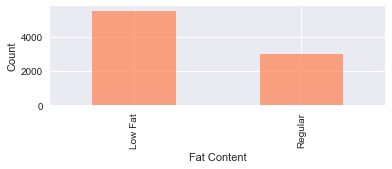

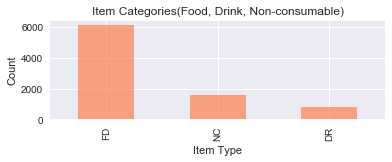

In [4]:
# Independent Categorical Variables 

_ = plt.subplot(2,1,1)
fat_content = train['Item_Fat_Content'].value_counts()
fat_content.plot(kind = 'bar', facecolor = 'coral', alpha = 0.7)
_ = plt.xlabel('Fat Content')
_ = plt.ylabel('Count')
plt.show()

_ = plt.subplot(2,1,2)
item_type = train['Item_Category'].value_counts()
item_type.plot(kind = 'bar', facecolor = 'coral', alpha = 0.7)
_ = plt.xlabel('Item Type')
_ = plt.ylabel('Count')
_ = plt.title('Item Categories(Food, Drink, Non-consumable)')
plt.show()


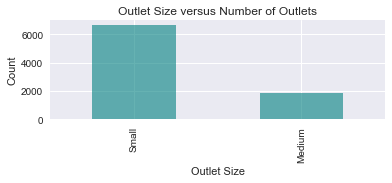

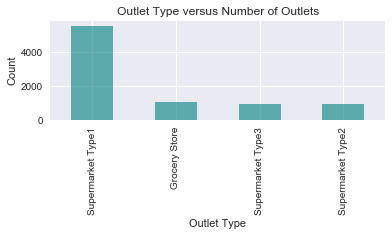

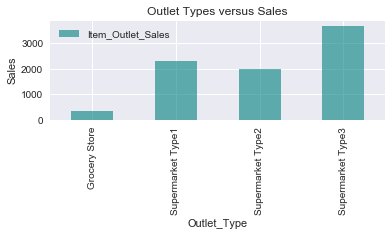

In [5]:
ax = plt.subplot(2,1,1)
outlet_size = train['Outlet_Size'].value_counts()
outlet_size.plot(kind = 'bar', facecolor = 'teal', alpha = 0.6, ax = ax)
plt.xlabel('Outlet Size')
plt.ylabel('Count')
plt.title('Outlet Size versus Number of Outlets')
plt.show()

ax = plt.subplot(2,1,2)
outlet_type = train['Outlet_Type'].value_counts()
outlet_type.plot(kind = 'bar', facecolor = 'teal', alpha = 0.6, ax = ax)
plt.xlabel('Outlet Type')
plt.ylabel('Count')
plt.title('Outlet Type versus Number of Outlets')
plt.show()

ax = plt.subplot(2,1,1)
outlet_type_sales_df = train.pivot_table(values = 'Item_Outlet_Sales', index = 'Outlet_Type')
outlet_type_sales_df.plot(kind = 'bar', facecolor = 'teal', alpha = 0.6, ax = ax)
plt.ylabel('Sales')
plt.title('Outlet Types versus Sales')
plt.show()

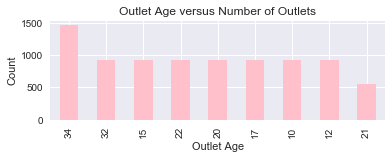

In [6]:
plt.subplot(2,1,2)
outlet_age = train['Outlet_Age'].value_counts()
outlet_age.plot(kind = 'bar', facecolor = 'pink')
plt.xlabel('Outlet Age')
plt.ylabel('Count')
plt.title('Outlet Age versus Number of Outlets')
plt.show()

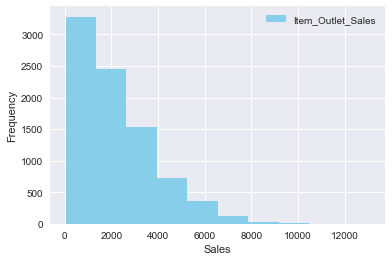

In [7]:
train[['Item_Outlet_Sales']].plot(kind = 'hist', bins = 10, facecolor = 'skyblue' )
plt.xlabel('Sales')
plt.show()

A bit skewed to the right.

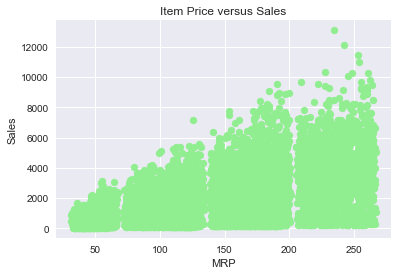

In [8]:
# Independent Variables versus target variable- Item Price vs Sales
plt.scatter(train['Item_MRP'], train['Item_Outlet_Sales'], s=None, facecolors = 'lightgreen' )
plt.xlabel('MRP')
plt.ylabel('Sales')
plt.title('Item Price versus Sales')
plt.show()

Price can be categorized into 4 bins

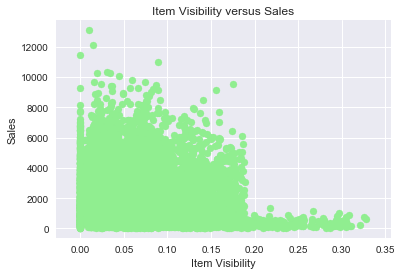

In [9]:
# Independent Variable versus target variable - Item Visibility vs Sales
plt.scatter(train['Item_Visibility'], train['Item_Outlet_Sales'], s=None, facecolors = 'lightgreen' )
plt.xlabel('Item Visibility')
plt.ylabel('Sales')
plt.title('Item Visibility versus Sales')
plt.show()

Right skewed, there are some outliers

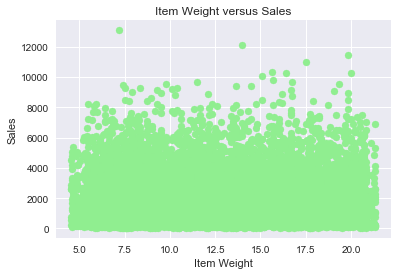

In [10]:
# Independent Variable versus target variable - Item Weight vs sales 
plt.scatter(train['Item_Weight'], train['Item_Outlet_Sales'], s=None, facecolors = 'lightgreen' )
plt.xlabel('Item Weight')
plt.ylabel('Sales')
plt.title('Item Weight versus Sales')
plt.show()

Some outliers here, no obvious pattern

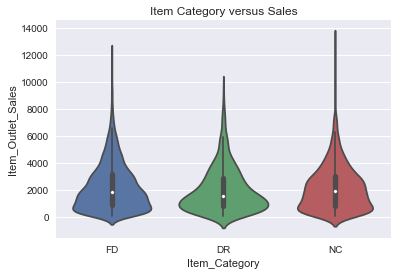

In [11]:
# Item Type versus Oulet Sales
_ = sns.violinplot(x = 'Item_Category', y = 'Item_Outlet_Sales', data = train)
_ = plt.title('Item Category versus Sales')
plt.show()

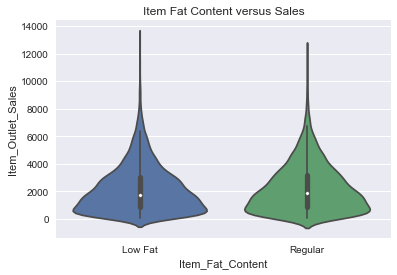

In [12]:
# Fat Content versus Outlet Sales 
_ = sns.violinplot(x = 'Item_Fat_Content', y = 'Item_Outlet_Sales', data = train)
_ = plt.title('Item Fat Content versus Sales')
plt.show()

 Distribution of Outlet Sales for Low Fat and Regular is not very distinct

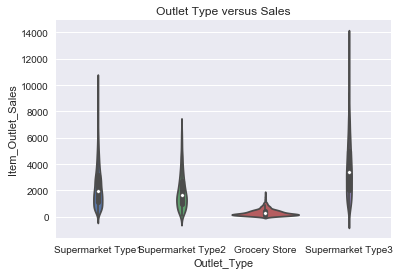

In [13]:
# Outlet Types versus Sales
_ = sns.violinplot(x = 'Outlet_Type', y = 'Item_Outlet_Sales', data = train)
_ = plt.title('Outlet Type versus Sales')
plt.show()

Grocery store has most of its data points around the lower sales values

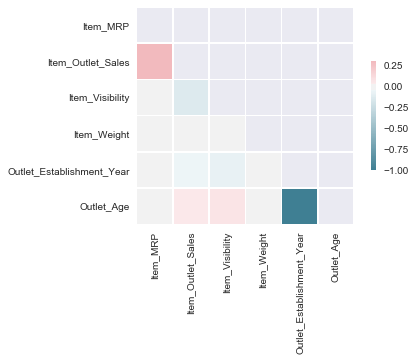

In [14]:
corr = train.corr()
# Generate a mask for the upper triangle

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
 
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

There is a strong correlation between the item price and sales